# Business Problem Understanding
- Dream Housing Company deals in all kinds of home loans. They have presence across all urban and rural areas. Customers first applies for home load and after that company validates the customer eligibility for loan.
- Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Martial Status,Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process they have provided a dataset to identify the customer segments that are eligible for loan amounts so that they can specifically target these customers.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("LoanData.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Data Understanding
- Loan_ID : Unique Loan ID
- Gender : Male/Female
- Married : Applicant Married
- Dependents : Number of Dependents
- Eduction : Applicant Education
- Self_Employed : Wheather the applicant is Self employed
- ApplicantIncome : Applicant Income
- CoapplicantIncome : Coapplicant Income
- LoanAmount : Loan amount in thousands
- Loan_Amount_Term : Term of loan in months
- Credit_History : Credit History meets guidelines
- Property_Area : Urban/Semi Urban/Rural
- Loan_status : Loan Approved **Target Variable**

In [5]:
df["Loan_ID"].unique()

array(['LP001002', 'LP001003', 'LP001005', 'LP001006', 'LP001008',
       'LP001011', 'LP001013', 'LP001014', 'LP001018', 'LP001020',
       'LP001024', 'LP001027', 'LP001028', 'LP001029', 'LP001030',
       'LP001032', 'LP001034', 'LP001036', 'LP001038', 'LP001041',
       'LP001043', 'LP001046', 'LP001047', 'LP001050', 'LP001052',
       'LP001066', 'LP001068', 'LP001073', 'LP001086', 'LP001087',
       'LP001091', 'LP001095', 'LP001097', 'LP001098', 'LP001100',
       'LP001106', 'LP001109', 'LP001112', 'LP001114', 'LP001116',
       'LP001119', 'LP001120', 'LP001123', 'LP001131', 'LP001136',
       'LP001137', 'LP001138', 'LP001144', 'LP001146', 'LP001151',
       'LP001155', 'LP001157', 'LP001164', 'LP001179', 'LP001186',
       'LP001194', 'LP001195', 'LP001197', 'LP001198', 'LP001199',
       'LP001205', 'LP001206', 'LP001207', 'LP001213', 'LP001222',
       'LP001225', 'LP001228', 'LP001233', 'LP001238', 'LP001241',
       'LP001243', 'LP001245', 'LP001248', 'LP001250', 'LP0012

In [6]:
df.drop(columns=["Loan_ID"],inplace=True)

In [7]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
df["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [9]:
df["Gender"].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [10]:
df["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [11]:
df["Married"].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [12]:
df["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [13]:
df["Dependents"].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [14]:
df["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [15]:
df["Education"].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [16]:
df["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [17]:
df["Self_Employed"].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [18]:
df["ApplicantIncome"].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [19]:
df["CoapplicantIncome"].unique()

array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

In [20]:
df["LoanAmount"].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [21]:
df["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [22]:
df["Loan_Amount_Term"].dtype

dtype('float64')

In [23]:
df["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [24]:
df["Credit_History"].unique()

array([ 1.,  0., nan])

In [25]:
df["Credit_History"].dtype

dtype('float64')

In [26]:
df["Credit_History"].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [27]:
df["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [28]:
df["Property_Area"].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [29]:
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [30]:
df["Loan_Status"].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [31]:
continous = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

discrete_categorical = ['Gender', 'Married',"Education",'Self_Employed','Property_Area','Credit_History',"Loan_Status"]

discrete_count = ['Dependents', 'Loan_Amount_Term']

In [32]:
df[continous].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


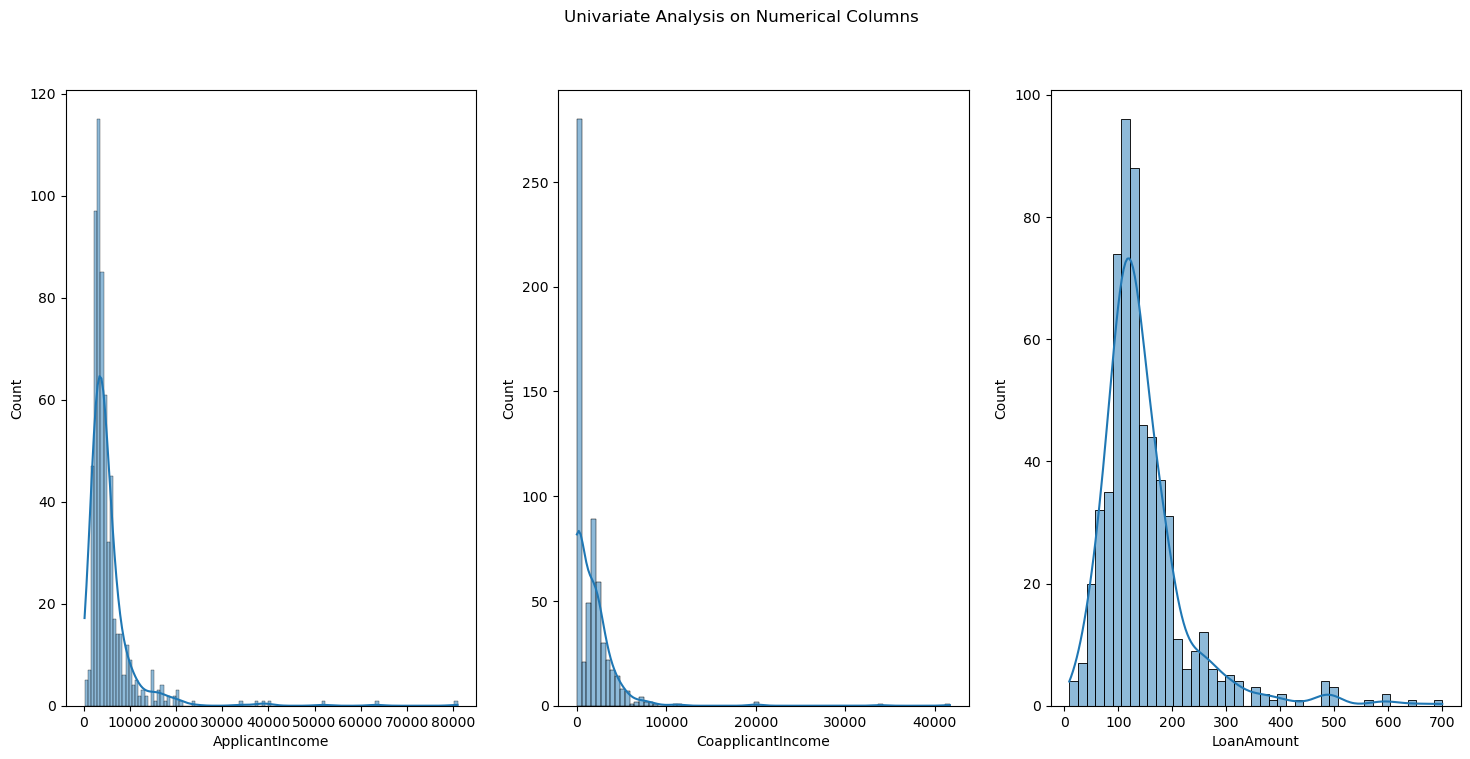

In [33]:
plt.rcParams["figure.figsize"] = (18,8)

plt.subplot(1,3,1)
sns.histplot(df["ApplicantIncome"],kde=True)

plt.subplot(1,3,2)
sns.histplot(df["CoapplicantIncome"],kde=True)

plt.subplot(1,3,3)
sns.histplot(df["LoanAmount"],kde=True)

plt.suptitle("Univariate Analysis on Numerical Columns")
plt.show()

In [34]:
df[continous].skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
dtype: float64

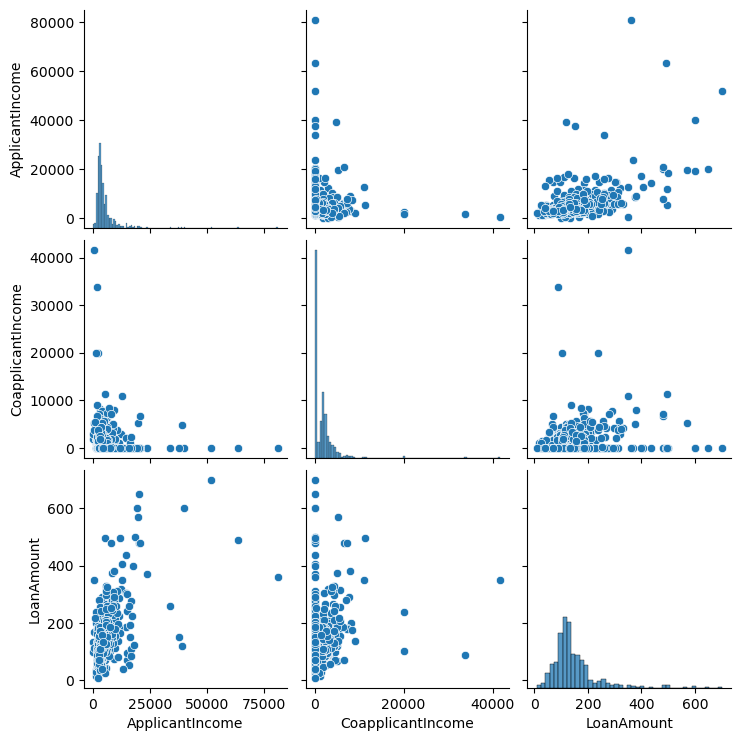

In [35]:
sns.pairplot(df[continous])
plt.show()

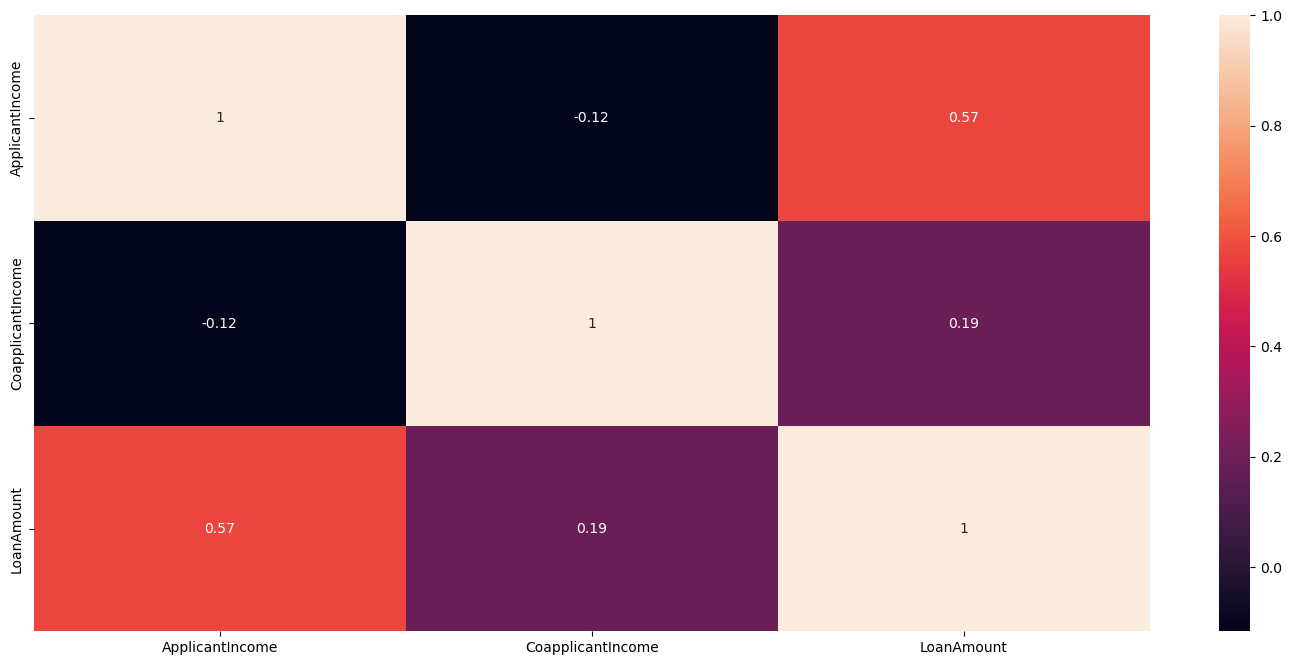

In [36]:
sns.heatmap(df[continous].corr(),annot=True)
plt.show()

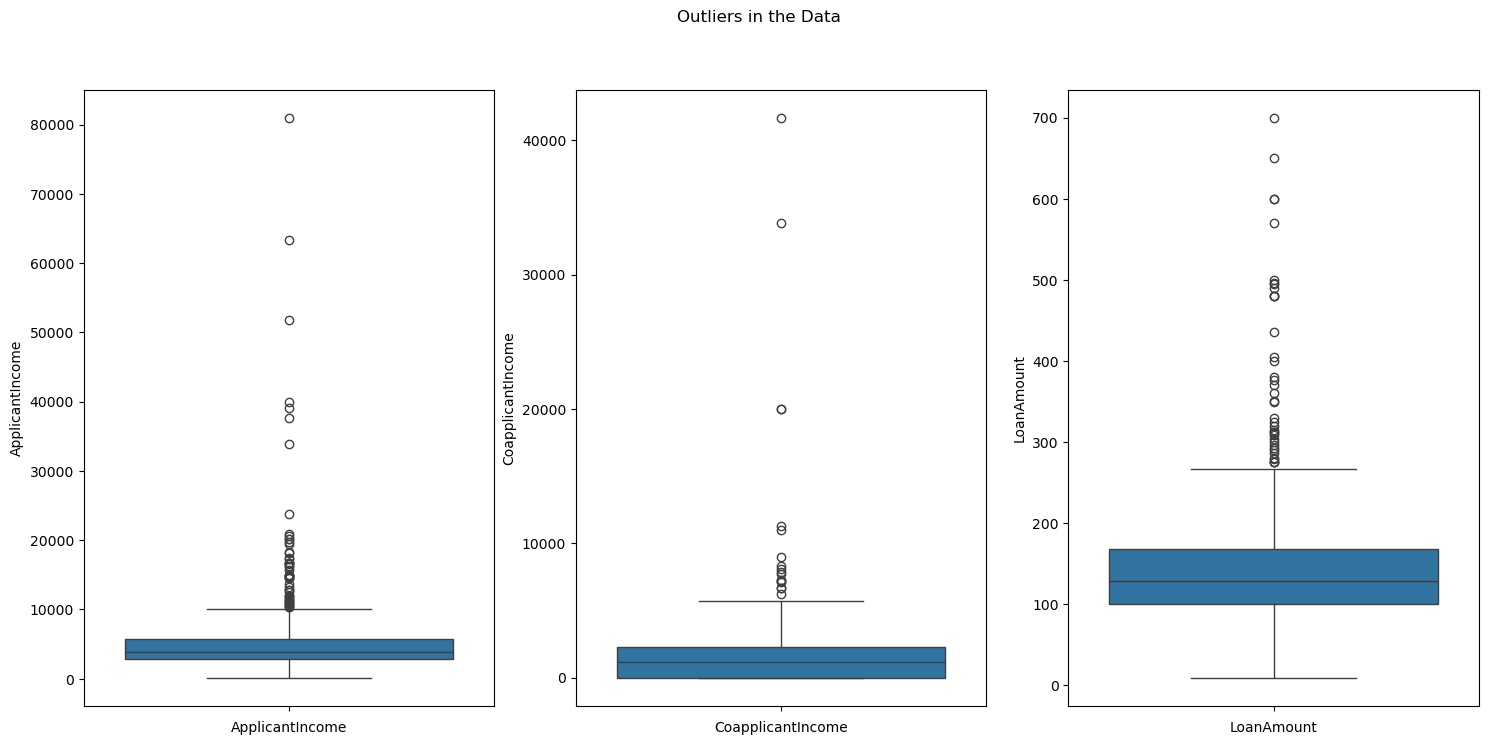

In [37]:
# Visualization on Outliers using Box plot

plt.subplot(1,3,1)
plt.xlabel("ApplicantIncome")
sns.boxplot(df["ApplicantIncome"])

plt.subplot(1,3,2)
plt.xlabel("CoapplicantIncome")
sns.boxplot(df["CoapplicantIncome"])

plt.subplot(1,3,3)
plt.xlabel("LoanAmount")
sns.boxplot(df["LoanAmount"])

plt.suptitle("Outliers in the Data")
plt.show()

In [38]:
df[discrete_categorical].describe(include="object")

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,614,582,614,614
unique,2,2,2,2,3,2
top,Male,Yes,Graduate,No,Semiurban,Y
freq,489,398,480,500,233,422


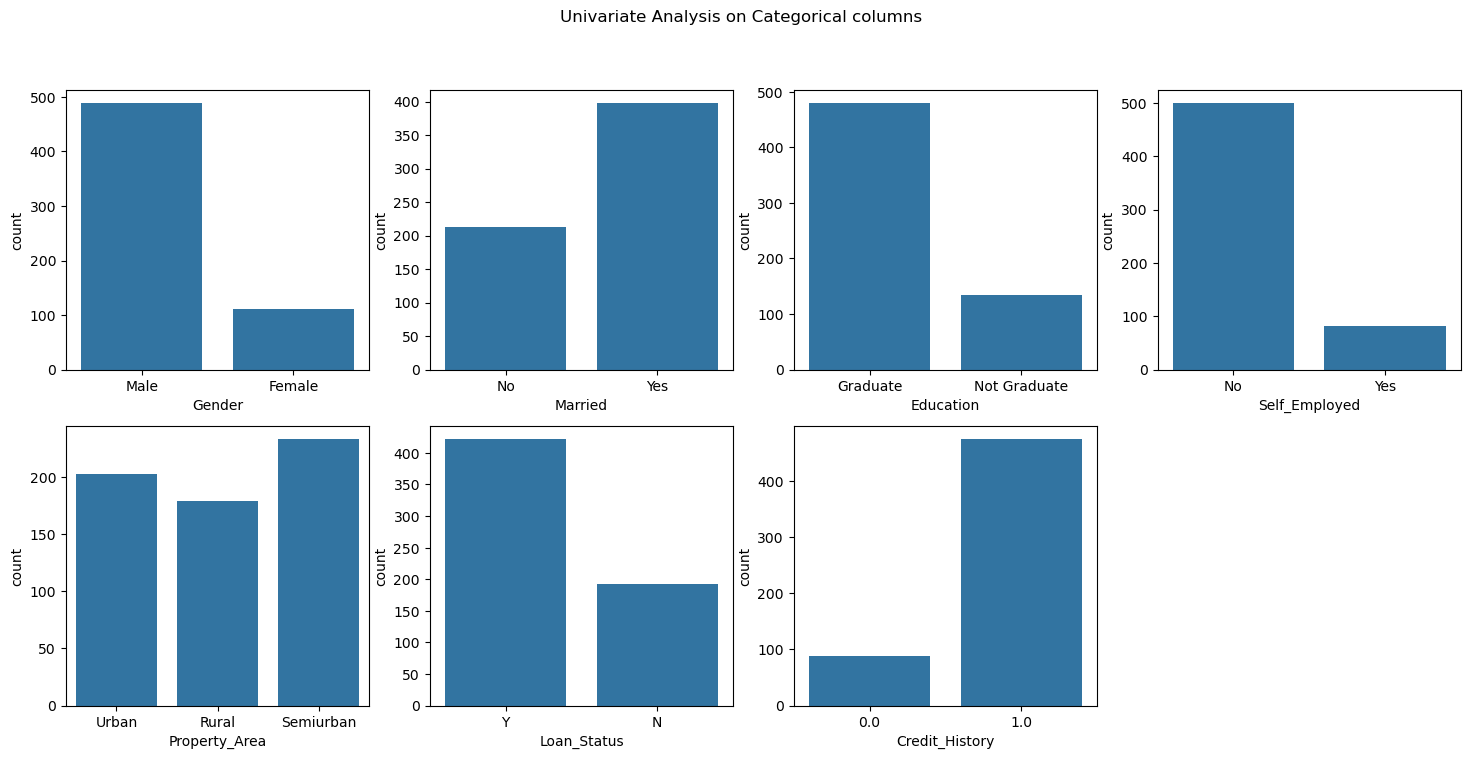

In [39]:
plt.rcParams["figure.figsize"]= (18,8)

plt.subplot(2,4,1)
sns.countplot(x=df["Gender"])

plt.subplot(2,4,2)
sns.countplot(x=df["Married"])

plt.subplot(2,4,3)
sns.countplot(x=df["Education"])

plt.subplot(2,4,4)
sns.countplot(x=df["Self_Employed"])

plt.subplot(2,4,5)
sns.countplot(x=df["Property_Area"])

plt.subplot(2,4,6)
sns.countplot(x=df["Loan_Status"])

plt.subplot(2,4,7)
sns.countplot(x=df["Credit_History"])

plt.suptitle("Univariate Analysis on Categorical columns")
plt.show()

In [40]:
df[discrete_count].describe(include="all")

,Dependents,Loan_Amount_Term
count,599,600.00000
unique,4,NaN
top,0,NaN
freq,345,NaN
mean,NaN,342.00000
std,NaN,65.12041
min,NaN,12.00000
25%,NaN,360.00000
50%,NaN,360.00000
75%,NaN,360.00000


## Data Preparation

In [41]:
df["Income"] = df["ApplicantIncome"] + df["CoapplicantIncome"]
df.drop(columns=["ApplicantIncome","CoapplicantIncome"],inplace=True)

#### Modifying the wrong data

In [42]:
df["Dependents"] = df["Dependents"].replace({"3+":3})

#### Missing Values Treatment

In [43]:
# Checking no. of Missing Values
df.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

In [44]:
# Checking for percentage of Missing Values
df.isnull().sum()/len(df)*100

Gender              2.117264
Married             0.488599
Dependents          2.442997
Education           0.000000
Self_Employed       5.211726
LoanAmount          3.583062
Loan_Amount_Term    2.280130
Credit_History      8.143322
Property_Area       0.000000
Loan_Status         0.000000
Income              0.000000
dtype: float64

In [45]:
# Dropping missing Values from important features as they cannot be replaced
df = df.dropna(subset=["Income","LoanAmount","Loan_Amount_Term","Credit_History","Property_Area"])

In [46]:
# Count Variable replace with 0
df["Dependents"] = df["Dependents"].fillna(0)

In [47]:
# Categorical variables replace with mode
df["Gender"] = df["Gender"].fillna(df['Gender'].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

In [48]:
df.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Income              0
dtype: int64

#### Outliers Treatment
### Encoding

In [49]:
# Encoding from str to int
df["Gender"] = df["Gender"].map({"Male":1,"Female":0}).astype("int")
df["Married"] = df["Married"].map({"Yes":1,"No":0}).astype("int")
df["Education"] = df["Education"].map({"Graduate":1,"Not Graduate":0}).astype("int")
df["Self_Employed"] = df["Self_Employed"].map({"Yes":1,"No":0}).astype("int")
df["Property_Area"] = df["Property_Area"].map({"Rural":0,"Semiurban":1,"Urban":2}).astype("int")
df["Loan_Status"] = df["Loan_Status"].map({"Y":1,"N":0}).astype("int")

In [50]:
df["Credit_History"].unique()

array([1., 0.])

In [51]:
# Encoding from float to int
df["Credit_History"] = df["Credit_History"].map({1.0:1,0.0:0}).astype("int")

#### Datatype Conversion

In [52]:
df["Dependents"] = df["Dependents"].astype("int")
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].astype("int")

#### Transformations

In [53]:
df[["Income","LoanAmount"]].skew()

Income        5.777628
LoanAmount    2.607945
dtype: float64

In [54]:
from scipy.stats import boxcox
# transforming training data &  save lambda value
df["Income"],param = boxcox(df["Income"])
df["Income"].skew()

-0.02776906884678578

In [55]:
# Log Transformation
# df["Income"] = np.log(df["Income"])
# df["Income"].skew() #-0.0377

In [56]:
# Root Transformation
# df["Income"] = np.sqrt(df["Income"])**(1/2)
# df["Income"].skew() #-0.04987

In [57]:
from scipy.stats import boxcox
# transforming training data &  save lambda value
df["LoanAmount"],param = boxcox(df["LoanAmount"])
df["LoanAmount"].skew() # 0.03

0.03828914734568106

In [58]:
# Root Transformation
# df["LoanAmount"] = df["LoanAmount"]**(1/12)
# df["LoanAmount"].skew()  # -0.0155553

In [59]:
# Log Transformation
# df["LoanAmount"] = np.log(df["LoanAmount"])
# df["LoanAmount"].skew() # -0.296

In [60]:
df[["Income","LoanAmount"]].skew()

Income       -0.027769
LoanAmount    0.038289
dtype: float64

In [61]:
df["Loan_Amount_Term"] = df["Loan_Amount_Term"]/12

#### Create X & y

In [62]:
X = df.drop("Loan_Status",axis=1)
y = df["Loan_Status"]

In [63]:
Train = []
Test = []
CV = []

for i in range (0,101): # Try from (0,10),(0,20),(0,30),....(0,101)
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2,random_state=i)
    
    from sklearn.linear_model import LogisticRegression # model Selection
    log_default = LogisticRegression() # Model name changing 
    log_default.fit(X_train,y_train)
    
    ypred_train = log_default.predict(X_train)
    ypred_test = log_default.predict(X_test)
    
    from sklearn.metrics import accuracy_score
    Train.append(accuracy_score(y_train,ypred_train))
    Test.append(accuracy_score(y_test,ypred_test))
    
    from sklearn.model_selection import cross_val_score
    CV.append(cross_val_score(log_default,X_train,y_train,cv=5,scoring="accuracy").mean())
    
em = pd.DataFrame({"Train":Train,"Test":Test,"CV":CV})
gm = em[(abs(em["Train"]-em["Test"])<=0.05) & (abs(em["Test"]-em["CV"])<=0.05)]
rs = gm[gm["CV"]==gm["CV"].max()].index.to_list()[0]
print("Best random_state number is:",rs)  

Best random_state number is: 70


In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=70)

In [65]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income
158,1,0,0,1,0,6.138816,30.0,1,0,1.863067
119,0,0,0,1,0,7.428854,30.0,1,2,1.869529
448,1,1,2,1,0,6.502836,30.0,0,0,1.863039
519,0,0,0,0,0,5.766309,30.0,1,0,1.858282
391,1,1,3,1,0,7.533593,30.0,1,0,1.868844
...,...,...,...,...,...,...,...,...,...,...
70,1,1,0,1,0,6.730146,30.0,1,2,1.865255
370,0,0,0,1,1,4.928045,30.0,1,1,1.872270
140,1,1,2,1,0,6.852435,30.0,1,0,1.866439
252,1,0,0,0,1,5.909606,30.0,1,0,1.862366


In [66]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income
174,1,1,0,0,1,5.628277,30.0,1,1,1.863103
84,1,1,1,1,0,4.786491,20.0,1,2,1.860321
453,1,1,0,1,0,5.681328,15.0,0,0,1.862820
229,1,0,0,1,1,6.984274,30.0,1,0,1.865445
589,1,1,2,1,1,5.939927,30.0,0,1,1.855156
...,...,...,...,...,...,...,...,...,...,...
191,1,0,0,1,0,6.650688,30.0,1,1,1.870538
526,1,1,0,1,0,5.999056,30.0,1,1,1.859638
2,1,1,0,1,1,5.202610,30.0,1,2,1.856556
571,1,1,0,1,0,6.660808,30.0,0,2,1.865689


## Machine Learning Modelling & Evaluation
### 1. Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

ypred_train = log_model.predict(X_train)
ypred_test = log_model.predict(X_test)

# Train Accuracy
from sklearn.metrics import accuracy_score
print("Train Accuracy :",accuracy_score(y_train,ypred_train))

# Cross validation Score
from sklearn.model_selection import cross_val_score
print("Cross Validation Score :",cross_val_score(log_model,X_train,y_train,cv=5,scoring="accuracy").mean())

print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.8226950354609929
Cross Validation Score : 0.8227731092436976
Test Accuracy : 0.7830188679245284


### 2. K-NN
#### Hyperparameter Tuning for KNN Classifier

In [68]:
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()

param_grid = {"n_neighbors":list(range(1,100))}

from sklearn.model_selection import GridSearchCV
knn_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
knn_grid.fit(X_train,y_train)

knn_model = knn_grid.best_estimator_

ypred_train = knn_model.predict(X_train)
ypred_test = knn_model.predict(X_test)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("Cross Validation Score :",cross_val_score(knn_model,X_train,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.7541371158392435
Cross Validation Score : 0.7375910364145659
Test Accuracy : 0.7075471698113207


### 3. Support Vector Machines (SVM)

In [69]:
from sklearn.svm import SVC 

estimator = SVC()
param_grid = {"C":[0.01,0.1,1,10,100],"kernel":["linear","rbf","sigmoid","poly"]} # {"C":list(range(0,100))}

from sklearn.model_selection import GridSearchCV
svm_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
svm_grid.fit(X_train,y_train)

svm_model = svm_grid.best_estimator_

ypred_train = svm_model.predict(X_train)
ypred_test = svm_model.predict(X_test)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("Cross Validation Score :",cross_val_score(svm_model,X_train,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.8226950354609929
Cross Validation Score : 0.8227731092436976
Test Accuracy : 0.7830188679245284


### 4 . Decision Tree Classifier

In [70]:
from sklearn.tree import DecisionTreeClassifier
estimator = DecisionTreeClassifier(random_state=rs)
param_grid = {"criterion":["gini","entropy"],"max_depth":list(range(1,16))} # "max_depth":list(range(0,100))

from sklearn.model_selection import GridSearchCV
dt_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
dt_grid.fit(X_train,y_train)

# Identifying the best model
dt = dt_grid.best_estimator_

# Identify the importance of each features
dt_fi = dt.feature_importances_

# Identifying the Features where the feature importance is greater than 0
index = [i for i,x in enumerate(dt_fi)if x>0]

# Create new dataset with important features
X_train_dt = X_train.iloc[:,index]
X_test_dt = X_test.iloc[:,index]

# Train with best model & with important features
dt.fit(X_train_dt,y_train)

ypred_train = dt.predict(X_train_dt)
ypred_test = dt.predict(X_test_dt)

# Evaluate the best model
print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("Cross Validation Score :",cross_val_score(dt,X_train_dt,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.8226950354609929
Cross Validation Score : 0.8227731092436976
Test Accuracy : 0.7830188679245284


In [71]:
dt_grid.best_estimator_

DecisionTreeClassifier(max_depth=1, random_state=70)

In [72]:
X_train_dt

,Credit_History
158,1
119,1
448,0
519,1
391,1
...,...
70,1
370,1
140,1
252,1


### 5. Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(random_state=rs)
param_grid = {"n_estimators":list(range(1,51))}

from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
rf_grid.fit(X_train,y_train)

rf = rf_grid.best_estimator_
rf_fi = rf.feature_importances_

index = [i for i,x in enumerate(rf_fi) if x>0]

X_train_rf = X_train.iloc[:,index]
X_test_rf = X_test.iloc[:,index]

rf.fit(X_train_rf,y_train)

ypred_train = rf.predict(X_train_rf)
ypred_test = rf.predict(X_test_rf)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("Cross Validation Score :",cross_val_score(rf,X_train_rf,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.9905437352245863
Cross Validation Score : 0.8063025210084034
Test Accuracy : 0.7641509433962265


#### 6. AdaBoost Classifier

In [74]:
from sklearn.ensemble import AdaBoostClassifier
estimator = AdaBoostClassifier(random_state=rs)
param_grid = {"n_estimators":list(range(1,51))}

from sklearn.model_selection import GridSearchCV
ab_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
ab_grid.fit(X_train,y_train)

ab = ab_grid.best_estimator_
ab_fi = ab.feature_importances_

index = [i for i,x in enumerate(ab_fi) if x>0]

X_train_ab = X_train.iloc[:,index]
X_test_ab = X_test.iloc[:,index]

ab.fit(X_train_ab,y_train)

ypred_train = ab.predict(X_train_ab)
ypred_test = ab.predict(X_test_ab)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("Cross Validation Score :",cross_val_score(ab,X_train_ab,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.83451536643026
Cross Validation Score : 0.8298879551820729
Test Accuracy : 0.7641509433962265


#### 7. Gradient Boost Classifier

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
estimator = GradientBoostingClassifier(random_state=rs)
param_grid = {"n_estimators":list(range(1,10)),"learning_rate":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}

from sklearn.model_selection import GridSearchCV
gb_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
gb_grid.fit(X_train,y_train)

gb = gb_grid.best_estimator_
gb_fi = gb.feature_importances_

index = [i for i,x in enumerate(gb_fi) if x>0]

X_train_gb = X_train.iloc[:,index]
X_test_gb = X_test.iloc[:,index]

gb.fit(X_train_gb,y_train)

ypred_train = gb.predict(X_train_gb)
ypred_test = gb.predict(X_test_gb)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("Cross Validation Score :",cross_val_score(gb,X_train_gb,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.8747044917257684
Cross Validation Score : 0.8180952380952382
Test Accuracy : 0.7358490566037735


#### 8. XGBoost Classifier

In [76]:
from xgboost import XGBClassifier
estimator = XGBClassifier(random_state=rs)
param_grid = {"n_estimators":[10,20,40,100],"max_depth":[3,4,5],"gamma":[0,0.15,0.3,0.5,1]}

from sklearn.model_selection import GridSearchCV
xgb_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
xgb_grid.fit(X_train,y_train)

xgb = xgb_grid.best_estimator_

xgb_fi = xgb.feature_importances_

index = [i for i,x in enumerate(xgb_fi) if x>0]

X_train_xgb = X_train.iloc[:,index]
X_test_xgb = X_test.iloc[:,index]

xgb.fit(X_train_xgb,y_train)

ypred_train = xgb.predict(X_train_xgb)
pred_test = xgb.predict(X_test_xgb)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("Cross Validation Score :",cross_val_score(xgb,X_train_xgb,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.8557919621749409
Cross Validation Score : 0.8275070028011206
Test Accuracy : 0.7358490566037735
